In [8]:
from skimage.color import rgb2gray
from skimage import io
from skimage.viewer import ImageViewer
import matplotlib.pyplot as plt
from skimage.transform import rotate, resize
import numpy as np
from sklearn.decomposition import PCA

/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [1]:
def plot_images(images):
    for image in images:
        plt.imshow(image, cmap='gray')
        plt.show()

In [14]:
def load_datasets():
    images = io.imread_collection('datasets/*/*.JPG')
    class_vector = []
    for file in images._files:
        if "first_dataset" in file:
            class_vector.append(0)
        elif "second_dataset" in file:
            class_vector.append(1)
        elif "third_dataset" in file:
            class_vector.append(2)
    transformed_images = []
    for idx, image in enumerate(images):
        gray_image = rgb2gray(image)
        if class_vector[idx] == 0 or class_vector[idx] == 2:
            rotated_image = rotate(gray_image, -90)
        else:
            rotated_image = rotate(gray_image, 180)
        rescaled_image = resize(rotated_image, (200, 200), mode='edge')
        transformed_images.append(rescaled_image)
    return transformed_images, class_vector

In [3]:
def vectorize_images(images):
    vectors = []
    for image in images:
        image_as_vector = image.flatten()
        vectors.append(image_as_vector)
    return vectors

In [4]:
def calculate_mean(vectors):
    return np.mean(vectors, axis=0)

In [5]:
def perform_PCA(vectors):
    pca = PCA()
    pca.fit(vectors)
    return pca

In [80]:
def perform_PCA_with_components_limit(vectors, components):
    pca = PCA(n_components = components)
    pca.fit(vectors)
    return pca

In [16]:
def analysis():
    images, class_vector = load_datasets()
    vectors = vectorize_images(images)
    mean = calculate_mean(vectors)
    pca = perform_PCA(vectors)
    return (pca, vectors, mean, class_vector)

def reconstruct_image(pca, vectors, mean, number_of_components):
    reconstructed = np.dot(pca.transform(vectors)[:,:number_of_components], pca.components_[:number_of_components,:])
    reconstructed += mean
    reconstructed_reshaped = []
    for image in reconstructed:
        reshaped = np.reshape(image, (200, 200))
        reconstructed_reshaped.append(reshaped)
    return reconstructed, reconstructed_reshaped
    

In [18]:
pca, vectors, mean, class_vector = analysis()
reconstructed, reconstructed_reshaped = reconstruct_image(pca, vectors, mean, 2)


Mean image:


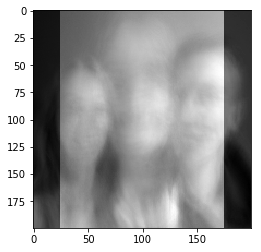

In [26]:
print ("Mean image:")
plot_images([np.reshape(mean, (200, 200))])

Komponenty:


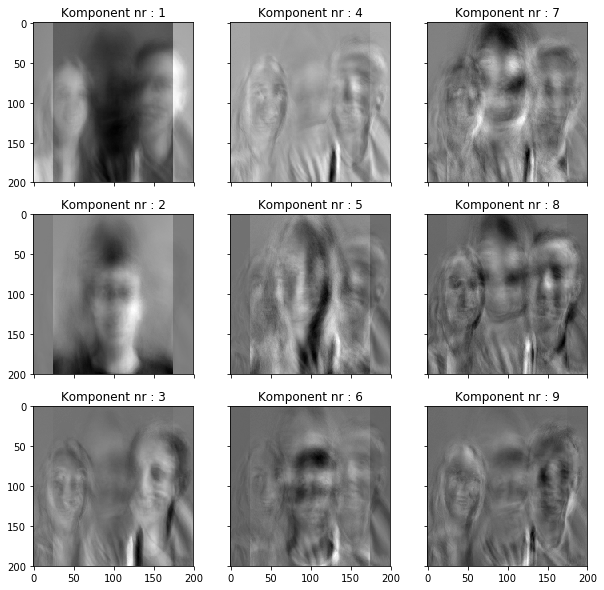

In [58]:
print ("Komponenty:")
components = pca.components_
most_important_components = components[:9]
reshaped_images = []
for component in most_important_components:
    reshaped = np.reshape(component, (200, 200))
    reshaped_images.append(reshaped)
    
fig, ax = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
    
for i in range(0, 3):
    for j in range(0, 3):
        ax[i, j].imshow(reshaped_images[j*3+i], cmap='gray')
        ax[i, j].set_title('Komponent nr : ' + str(1+j*3+i))
        
plt.show()
    

In [78]:
idx = [0, 25, 50, 100, 120, 160,  205, 175, 210]
number_of_vectors = [1, 2, 3, 4, 5, 10, 15, 25, 50, 100, 150, 200, 250]

for comp in number_of_vectors:
    reconstructed, reconstructed_reshaped = reconstruct_image(pca, vectors, mean, comp)
    images = []
    for id in idx:
        images.append(reconstructed_reshaped[id])
    
    fig, ax = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
    
    for i in range(0, 3):
        for j in range(0, 3):
            ax[i, j].imshow(images[j*3+i], cmap='gray')
    
    fig.suptitle('Rekonstrukcja z ' + str(comp) + ' wektorow')
   
    for a in ax.ravel():
        a.set_axis_off()

    #plt.show()
    plt.savefig('rekonstrukcja/' + str(comp) + '.png')
        

/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


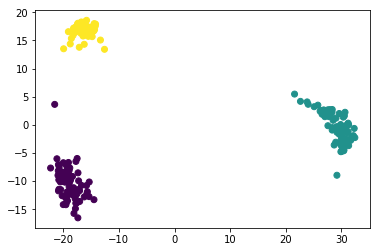

In [93]:
pca = perform_PCA_with_components_limit(vectors, 2)
transformed = pca.transform(vectors)

plt.scatter(transformed[:,0], transformed[:,1], c=class_vector)
plt.show()